# Modelos de Machine Learning para predecir la supervivencia de los pasajeros del Titanic

_Por: Valentina Miranda Garcés_

_septiembre de 2024_

Es posible encontrar bastante información sobre este evento, estudios que evalúan momento a momento la tragedia. Entre estos análisis es posible resaltar cómo fue todo el protocolo para salvar la mayor cantidad de vidas. De lo que se ha extraído, es claro que algunas características especiales permitieron que diferentes tipos de pasajeros tuvieran oportunidad de salvarse antes que otros. De antemano, se sabe que las personas de primera clase estaban ubicadas más próximas a los botes en los que se logró evacuar. Adicionalmente, durante todo el desarrollo del evento tuvieron como prioridad salvar a las mujeres y los niños, por lo que esto nos da una idea previa de claras tendencias. En este notebook vamos a conocer e identificar estas características para generar un modelo de Machine Learning que determine si una persona sobrevive o no. 

# 1. Análisis exploratorio de los datos

In [1]:
#se importan las librerías necesarias para todo el desarrollo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


El dataset contiene 12 columnas, de las cuales vemos que `PassengerId` es solo una numeración específica del dataset por lo que no brinda información relevante para el modelo. Adicionalmente, es importante reconocer nuestro target, el cual es la columna `Survived`. Con esto presente, tenemos que en un principio estaremos trabajando con 10 features. Ahora vamos a estudiar cada una de ellas

In [4]:
#esta columna no nos brinda ninguna información relevante para el modelo
df = df.drop(['PassengerId'], axis=1)

Lo primero que vamos a hacer es revisar datos nulos

In [5]:
#revisar tipos de datos y cantidad de datos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


Vemos que la mayoría de ellos están bastante organizados, sin datos nulos. Sin embargo, hay 3 features que debemos estudiar para saber si los datos nulos que hay tienen un significado específico o es necesario hacer modificaciones al respecto.

La primera variable que vamos a revisar es "Age"

Podría decirse que la cantidad de datos nulos para esta variable es considerable. Es necesario determinar una forma apropiada para llenar estos datos. En primer lugar se pensaría por usar un promedio, pero al ser una gran cantidad de datos nulos considero que podría llegar a agregar información errónea, por lo que sería apropiado evaluar otras alternativas.

Lo primero que se me ocurre es observar la distribución de las edades tanto por Ticket class (`Pclass`) como por sexo, puesto que estas son variables sin datos nulos y tal vez podrían brindar un mejor estimado para las edades faltantes.

<Axes: xlabel='Sex', ylabel='Age'>

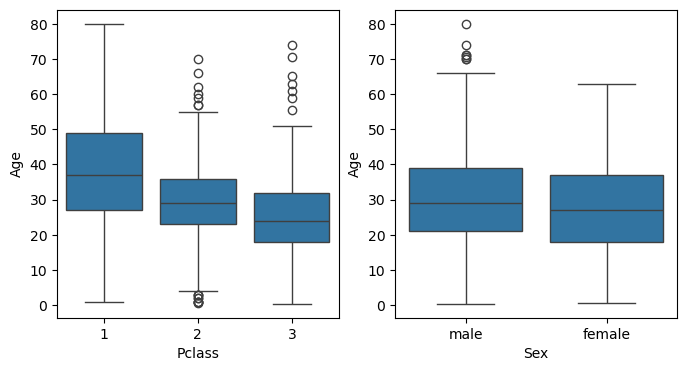

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing


sns.boxplot(x='Pclass', y='Age', data=df, ax=axes[0])
sns.boxplot(x='Sex', y='Age', data=df, ax=axes[1])


Vemos que por sexo no parece haber mucha diferencia en la distribución de las edades, y para ticket class sí parece haber un poco de diferencia entr las concentraciones de las edades, sin embargo, tanto la clase 2 como la 3 presentan outliers que pueden afectar el promedio que se saque de estas. Lo ideal sería buscar otra feature que pueda brindar más información sobre las edades.

Si observamos la columna de nombres, es posible identificar que todos tienen la estructura general "{last name}, {Title}. {Name}". En este sentido, un buen indicador del rango de edad de una persona es su título, pues este va cambiando a lo largo de su vida cuando se casa o tiene un determinado status social. Si se pudiese obtener una nueva columna con los títulos y sacar la edad promedio para cada uno, esto nos podría dar información más precisa sobre cómo llenar los datos nulos.

Esta brillante idea de tener en cuenta los títulos para determinar las edades me la contó Elizabeth y me pareció demasiado buena como para no usarla, por lo que considero muy importante atribuirle a ella este paso del desarrollo.

In [7]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [8]:
#usamos una expresión regular para extraer de la columna solo el título de la persona
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [9]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [10]:
#aqui calculamos la edad promedio para cada titulo
average_age_by_title = df.groupby('Title')['Age'].mean()

print(average_age_by_title)

Title
Capt            70.000000
Col             58.000000
Don             40.000000
Dr              42.000000
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           4.574167
Miss            21.773973
Mlle            24.000000
Mme             24.000000
Mr              32.368090
Mrs             35.898148
Ms              28.000000
Rev             43.166667
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64


Es posible observar una gran diferencia de edades promedio para cada uno de los títulos, por lo que es muy apropiado considerar cada título. Ahora es necesario agregar estos promedios para las edades nulas, conociendo el título de la persona.

In [11]:
age_null = df[df['Age'].isnull()]
age_null['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Dr'], dtype=object)

Vemos que en los datos nulos hay títulos con edades muy diferentes, por lo que tal vez con esta estrategia sea posible hacer un mejor estimado de cada uno de ellos

In [12]:
#crea un a serie con la misma cantidad de filas que el df original
#cada fila es el promedio de la edad para el titulo correspondiente en esa fila
mean_age_by_title = df.groupby('Title')['Age'].transform('mean')


#Llena los valores nulos con los promedios
df['Age'].fillna(mean_age_by_title, inplace=True)

df

C:\Users\Valentina Miranda\AppData\Local\Temp\ipykernel_18944\1321867614.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(mean_age_by_title, inplace=True)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,Rev
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.773973,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Mr


In [13]:
#revisar tipos de datos y cantidad de datos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
 11  Title     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


La siguiente columna es Cabin, la cual tiene una gran cantidad de datos nulos. Además de esto, no se me ocurre una forma lógica, óptima o aportante para el modelo en la que se pudiera llenar todos estos datos nulos. Lo único que considero que podría servir para obtener información relevante para el modelo de esta feature es saber si los datos nulos nos dicen algo acerca de la supervivencia del individuo. Para esto obtengo la proporción de datos no nulos en Cabin que sobrevivieron y los que no, y lo mismo para los datos nulos 

In [14]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [15]:
# Step 1: Filter rows where 'Cabin' is null
cabin_notnull = df[df['Cabin'].notnull()]

# Step 2: Group by 'Survived' and calculate proportions
survived_proportion_notnull = cabin_notnull.groupby('Survived').size() / len(cabin_notnull)

# Display the result
print(survived_proportion_notnull)


Survived
0    0.333333
1    0.666667
dtype: float64


In [16]:
# Step 1: Filter rows where 'Cabin' is null
cabin_null = df[df['Cabin'].isnull()]

# Step 2: Group by 'Survived' and calculate proportions
survived_proportion = cabin_null.groupby('Survived').size() / len(cabin_null)

# Display the result
print(survived_proportion)


Survived
0    0.700146
1    0.299854
dtype: float64


Creo que aquí puede haber algo de información relevante por lo que me gustaría intentar crear una nueva feature. Esta feature va a indicar si se tiene registrado el número de la cabina o no, pues, como podemos ver, parece haber una tendencia que indica que la mayoría de personas con su número de cabina registrado en el dataset sobreviven, mientras que pasa lo contrario con quienes no tienen el número de cabina en el dataset.

In [17]:
df['Cabin_binary'] = df['Cabin'].isnull().astype(int)

# Display the updated DataFrame
print(df[['Cabin', 'Cabin_binary']])

    Cabin  Cabin_binary
0     NaN             1
1     C85             0
2     NaN             1
3    C123             0
4     NaN             1
..    ...           ...
886   NaN             1
887   B42             0
888   NaN             1
889  C148             0
890   NaN             1

[891 rows x 2 columns]


La última variable con valores nulos en Embarked, que indica el puerto en el que la persona embarcó. Solo faltan 2 registros en esta columna, adicionalmente, es una feature categórica por lo que creo que lo más apropiado sería llenar estos valores con la moda.

In [18]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
mode_embarked = df['Embarked'].mode()[0]

df['Embarked'].fillna(mode_embarked, inplace=True)
#revisar tipos de datos y cantidad de datos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Name          891 non-null    object 
 3   Sex           891 non-null    object 
 4   Age           891 non-null    float64
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Ticket        891 non-null    object 
 8   Fare          891 non-null    float64
 9   Cabin         204 non-null    object 
 10  Embarked      891 non-null    object 
 11  Title         891 non-null    object 
 12  Cabin_binary  891 non-null    int32  
dtypes: float64(2), int32(1), int64(4), object(6)
memory usage: 87.1+ KB


C:\Users\Valentina Miranda\AppData\Local\Temp\ipykernel_18944\904449606.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(mode_embarked, inplace=True)


Antes de revisar más cosas, podríamos eliminar la columna `Name`, puesto que no nos brindaría información relevante y generalizada para el modelo, sin embargo, podríamos considerar en estudiar la nueva columna que obtuvimos de esta, `Title` más adelante (reconozco que hice algo de feature engineering en desorden).

In [20]:
df = df.drop(['Name'], axis=1)

Ahora que nos hicimos cargo de los valores nulos, podemos ver la relación de cada una de las features con el target.

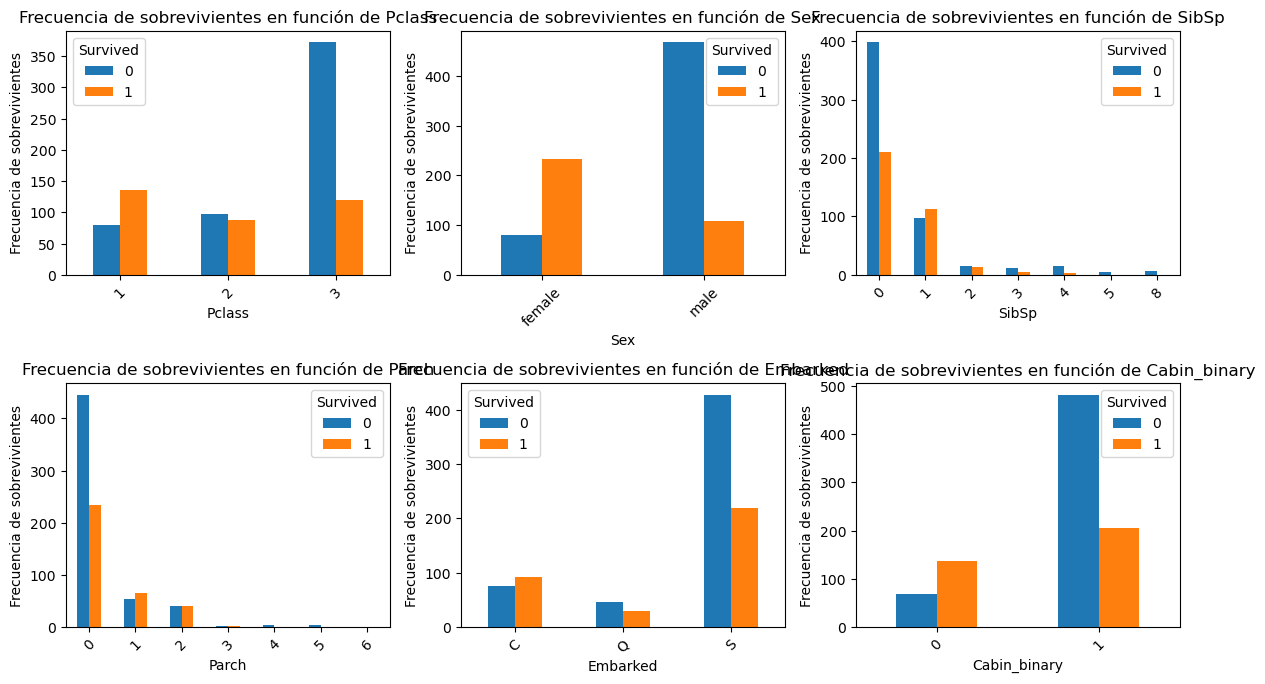

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


columns_to_plot = [column for column in df.columns if column != 'Survived' and len(df[column].unique()) <= 10]

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through each column and plot on the respective axis
for i, column in enumerate(columns_to_plot):
    pd.crosstab(df[column], df['Survived']).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Frecuencia de sobrevivientes en función de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia de sobrevivientes')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels if needed

# Remove any empty subplots if there are fewer than 6 columns to plot
if len(columns_to_plot) < len(axes):
    for i in range(len(columns_to_plot), len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Estas gráficas nos dan información muy relevante sobre cada una de las características con respecto al target.

- Pclass: vemos que la mayoría de los datos está concentrados en la clase 3, a su vez, en esta clase hay una gran proporción de personas que no sobreviven, lo cual tiene sentido considerando que la ubicación de estas era la más alejada a los botes en los que estaban evacuando.


- Sex: la información de esta gráfica es muy clara. Se observa que la mayoría de las mujeres sobrevivieron mientras que sucede lo contrario para los hombres. Esto tiene sentido pues, de acuerdo a los registros del suceso, durante todo el desastre siguieron la regla de salvar a mujeres y niños primero.


- SibSp: esta variable indica el número de hermanos y/o cónyuge con quien viajaba la persona. Se observa que la gran mayoría de las personas viajaban sin hermanos o cónyuge. A su vez, este mismo segmento de personas en su mayoría no sobrevivieron.


- Parch: número de padres o hijos con los que viajaban. Presenta una tendencia similar con la variable anterior.


- Embarked: de acuerdo con información de Wikipedia, el Titanic partió de Southampton (S), donde la mayor cantidad de pasajeros presentes en la tragedia abordaron. También es importante mencionar que la mayoría de estos eran de tercera clase. Depués de esto el barco se dirigió al puerto francés de Cherbourg (C), donde abordaron 142 pasajeros de primera clase y 102 de tercera clase. Esto me parece importante porque en las gráficas, por un lado tenemos que la mayoría de personas que abordaron primera clase sobrevivieron, y por otro lado tenemos que hubo una gran cantidad de personas de primera clase que abordaron en Chegbourg, con lo que la gráfica nos muestra que la mayor proporción de estas personas sobrevivieron, lo cual tiene mucho sentido. Por último, el barco hizo una nueva parada en Queenstown, donde la mayoría de pasajeros que embarcaron fueron de tercera clase, lo que puede explicar que en su mayoría no sobrevivieron


- Cabin_binary: a pesar de que esta ya es una nueva variable y hace parte de la fase de feature engineering, igualmente quería ver cómo se comportaba, y parece mostrar tendencias importantes para el modelo puesto que la mayoría de personas que no tienen registros en esta columna, no sobrevivieron.

In [22]:
# Step 1: Group by 'Title' and 'Survived', then calculate the size of each group
survival_counts_by_title = df.groupby(['Title', 'Survived']).size().unstack()

# Step 2: Calculate the proportion of people who survived and died
survival_proportion_by_title = survival_counts_by_title.div(survival_counts_by_title.sum(axis=1), axis=0)

# Display the proportion of survival and deaths for each title
print(survival_proportion_by_title)


Survived             0         1
Title                           
Capt          1.000000       NaN
Col           0.500000  0.500000
Don           1.000000       NaN
Dr            0.571429  0.428571
Jonkheer      1.000000       NaN
Lady               NaN  1.000000
Major         0.500000  0.500000
Master        0.425000  0.575000
Miss          0.302198  0.697802
Mlle               NaN  1.000000
Mme                NaN  1.000000
Mr            0.843327  0.156673
Mrs           0.208000  0.792000
Ms                 NaN  1.000000
Rev           1.000000       NaN
Sir                NaN  1.000000
the Countess       NaN  1.000000


Para esta nueva columna de `Title`la visualización con frecuencias no parece ser tan clara por lo que preferí obtener las proporciones de sobrevivientes y no sobrevivientes de acuerdo a los títulos, lo que me lleva a sugerir que es posible agrupar algunas de las categorías para que tenga menos cantidad y así poder hacer one hot encoding.

Los grupos que ordené de acuerdo a las proporciones fueron 4:

1. Capt, Don, Jonkheer, Mr, Rev (los que tienen este título es extremadamente probable que no sobrevivan)

2. Lady, Mlle, Mme, Ms, Sir, the Countess (los que tienen este título tienen las mayores probabilidades de sobrevivir)

3. Col, Dr, Major, Master (tienen las probabilidades más inciertas)

4. Miss, Mrs (tienen altas probabilidades de sobrevivir pero con menos certeza que el grupo 2)

In [23]:
df.loc[df['Title'].isin(['Capt', 'Don', 'Jonkheer', 'Mr', 'Rev']), 'Title'] = 'Group_1'
df.loc[df['Title'].isin(['Lady', 'Mlle', 'Mme', 'Ms', 'Sir', 'the Countess']), 'Title'] = 'Group_2'
df.loc[df['Title'].isin(['Col', 'Dr', 'Major', 'Master']), 'Title'] = 'Group_3'
df.loc[df['Title'].isin(['Miss', 'Mrs']), 'Title'] = 'Group_4'

Volvemos a calcular las probabilidades para cada grupo

In [24]:
# Step 1: Group by 'Title' and 'Survived', then calculate the size of each group
survival_counts_by_title = df.groupby(['Title', 'Survived']).size().unstack()

# Step 2: Calculate the proportion of people who survived and died
survival_proportion_by_title = survival_counts_by_title.div(survival_counts_by_title.sum(axis=1), axis=0)

# Display the proportion of survival and deaths for each title
print(survival_proportion_by_title)


Survived         0         1
Title                       
Group_1   0.846008  0.153992
Group_2        NaN  1.000000
Group_3   0.450980  0.549020
Group_4   0.263844  0.736156


<Axes: xlabel='Title'>

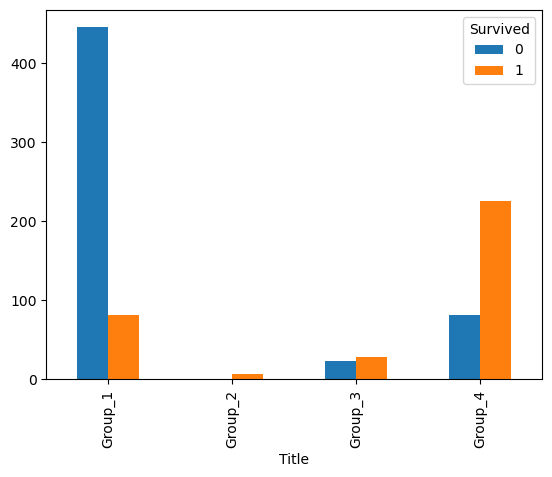

In [25]:
pd.crosstab(df['Title'], df['Survived']).plot(kind='bar')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    object 
 3   Age           891 non-null    float64
 4   SibSp         891 non-null    int64  
 5   Parch         891 non-null    int64  
 6   Ticket        891 non-null    object 
 7   Fare          891 non-null    float64
 8   Cabin         204 non-null    object 
 9   Embarked      891 non-null    object 
 10  Title         891 non-null    object 
 11  Cabin_binary  891 non-null    int32  
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 80.2+ KB


No vamos a usar la columna `Cabin` por lo que es posible eliminarla del df

In [27]:
df = df.drop(['Cabin'], axis=1)

Ahora vamos a hacer un boxplot y terminar de estudiar las demás variables continuas o con muchos valores diferentes

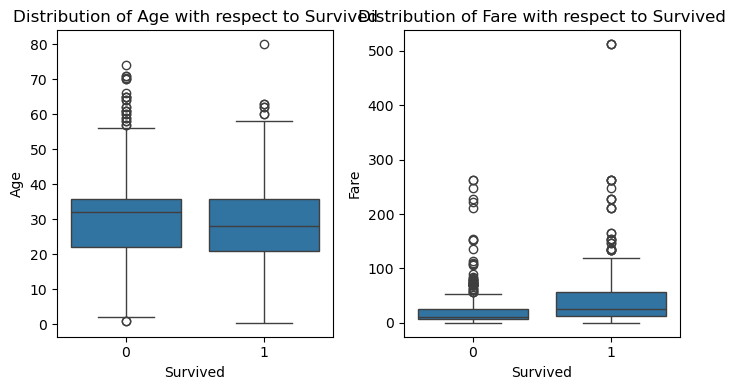

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

num_vars = ['Age', 'Fare']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through each feature and plot on the respective axis
for i, column in enumerate(num_vars):
    sns.boxplot(x='Survived', y=column, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {column} with respect to Survived')
    axes[i].set_xlabel('Survived')
    axes[i].set_ylabel(column)

# Remove any empty subplots if there are fewer than 10 columns to plot
if len(columns_to_plot) < len(axes):
    for i in range(len(columns_to_plot), len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Es posible observar que para la variable `Fare` hay una gran cantidad de datos atípicos. Con la información obtenida en internet y asumiendo que la columna `Fare` tiene los valores en libras, se tiene que la tarifa para los tiquetes podía variar entre 7 y hasta más de 800, dependiendo de la clase.

A continuación vamos a calcular los promedios de la tarifa para cada clase.

In [29]:
# Calculate the average fare for each Pclass
average_fare_by_pclass = df.groupby('Pclass')['Fare'].mean()

# Display the result
print(average_fare_by_pclass)

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


Si bien es cierto que, como es de esperarse, los precios sean diferentes dependiendo de las clases, con los diagramas de cajas no parece haber información muy clara en cuanto al chance de sobrevivir. Tal vez podría indicarse que en general las tarifas más bajas parecen sobrevivir menos pero la verdad es que tenemos features que nos dan información más relevante al respecto.

Para la edad es algo similar. A pesar de que se observa que la mediana de las personas que no sobrevivieron es mayor, en general no parece haber tendencias más claras o definidas.

Ahora vamos a ver la distribución de estas variables para observar si sería conveniente normalizar y volver a graficar los diagramas de caja

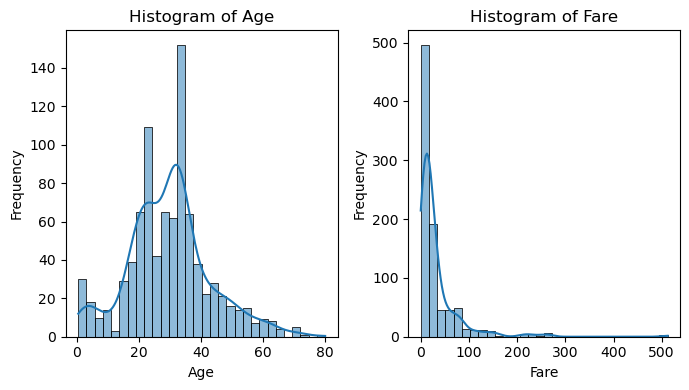

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

num_vars = ['Age', 'Fare']

# Loop through the significant variables and plot histograms
for i, var in enumerate(num_vars):
    sns.histplot(df[var], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

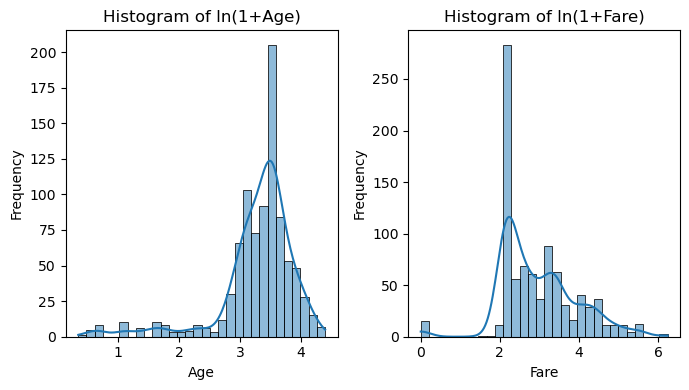

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

num_vars = ['Age', 'Fare']

# Loop through the significant variables and plot histograms
for i, var in enumerate(num_vars):
    sns.histplot(np.log1p(df[var]), bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of ln(1+{var})')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Podríamos pensar en normalizar Fare, mientras que Age se deja sin transformar.

In [32]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Cabin_binary
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S,Group_1,1
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C,Group_4,0
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Group_4,1
3,1,1,female,35.000000,1,0,113803,53.1000,S,Group_4,0
4,0,3,male,35.000000,0,0,373450,8.0500,S,Group_1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,S,Group_1,1
887,1,1,female,19.000000,0,0,112053,30.0000,S,Group_4,0
888,0,3,female,21.773973,1,2,W./C. 6607,23.4500,S,Group_4,1
889,1,1,male,26.000000,0,0,111369,30.0000,C,Group_1,0


Vamos a normalizar la variable `Fare` y hacer one hot encoding para `Embarked` y `Title`

In [33]:
df['Fare_norm'] = np.log1p(df['Fare'])
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True,dtype=int)
df = pd.get_dummies(df, columns=['Title'], drop_first=True,dtype=int)
df = pd.get_dummies(df, columns=['Sex'], drop_first=True,dtype=int)
df

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin_binary,Fare_norm,Embarked_Q,Embarked_S,Title_Group_2,Title_Group_3,Title_Group_4,Sex_male
0,0,3,22.000000,1,0,A/5 21171,7.2500,1,2.110213,0,1,0,0,0,1
1,1,1,38.000000,1,0,PC 17599,71.2833,0,4.280593,0,0,0,0,1,0
2,1,3,26.000000,0,0,STON/O2. 3101282,7.9250,1,2.188856,0,1,0,0,1,0
3,1,1,35.000000,1,0,113803,53.1000,0,3.990834,0,1,0,0,1,0
4,0,3,35.000000,0,0,373450,8.0500,1,2.202765,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,211536,13.0000,1,2.639057,0,1,0,0,0,1
887,1,1,19.000000,0,0,112053,30.0000,0,3.433987,0,1,0,0,1,0
888,0,3,21.773973,1,2,W./C. 6607,23.4500,1,3.196630,0,1,0,0,1,0
889,1,1,26.000000,0,0,111369,30.0000,0,3.433987,0,0,0,0,0,1


In [34]:
df['Age_norm'] = np.log1p(df['Age'])

Intenté buscar información sobre la feature de `Ticket` para conocer más sobre el significado de los datos pero no encontré algo lo suficientemente claro para agregarlo al desarrollo, por lo que voy a eliminar esta columna

In [35]:
df = df.drop(['Ticket'], axis=1)

Ahora que tenemos todas las features numéricas, podemos obtener la correlación y así determinar con un mejor criterio las posibles features para entrenar el modelo

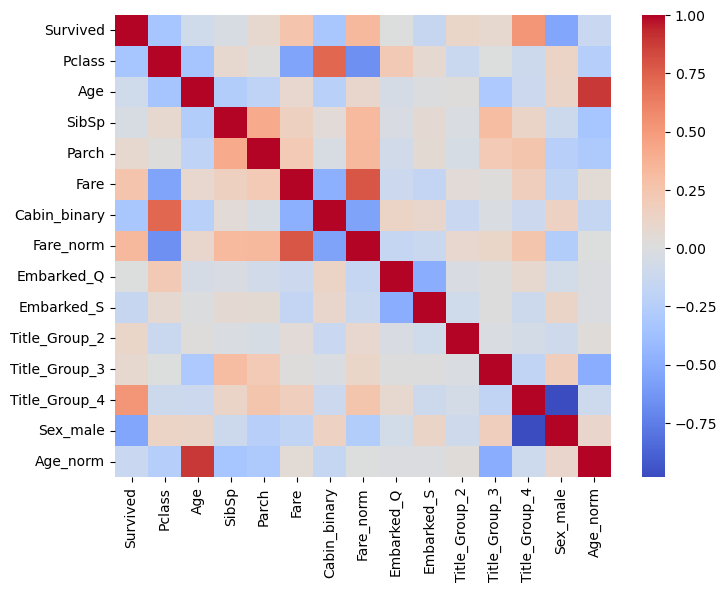

In [36]:
numerical_type_cols = df.dtypes[df.dtypes != 'object'].index.tolist()
corr_num = df[numerical_type_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_num, cmap="coolwarm", annot=False)

plt.show()

Es posible observar varios pares de features con una correlación considerable:

- Fare_norm y Pclass: correlación inversa
- Cabin_binary y Pclass: correlación directa
- Survived y Title_Group_4 : correlación directa
- Survived y Sex_male : correlación inversa
- Title_Group_4 y Sex_male : correlación inversa (estas tienen una correlación muy alta)

Aunque todas las features son numéricas, creo que estaría bien echar un vistazo a los mutual information scores

In [37]:
from sklearn.metrics import mutual_info_score

def mutual_info_churn_score(series):
    return mutual_info_score(series, df.Survived)
mi = df[df.columns].apply(mutual_info_churn_score)
#mi.sort_values(ascending=False)
mi

C:\Users\Valentina Miranda\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\Valentina Miranda\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\Valentina Miranda\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\Valentina Miranda\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for la

Survived         0.665912
Pclass           0.058107
Age              0.107205
SibSp            0.023197
Parch            0.016366
Fare             0.302990
Cabin_binary     0.049270
Fare_norm        0.302990
Embarked_Q       0.000007
Embarked_S       0.011028
Title_Group_2    0.007573
Title_Group_3    0.003393
Title_Group_4    0.140352
Sex_male         0.150870
Age_norm         0.107205
dtype: float64

Y obtener la correlación de cada feature pero solo con el target

In [38]:
df[numerical_type_cols].corrwith(df.Survived).abs()

Survived         1.000000
Pclass           0.338481
Age              0.089135
SibSp            0.035322
Parch            0.081629
Fare             0.257307
Cabin_binary     0.316912
Fare_norm        0.329862
Embarked_Q       0.003650
Embarked_S       0.149683
Title_Group_2    0.112745
Title_Group_3    0.083692
Title_Group_4    0.525262
Sex_male         0.543351
Age_norm         0.133433
dtype: float64

- De MIS obtenemos las variables con el mayor puntaje (relativo): Age, Fare_norm, Title_Group_4, Sex_male

- De la correlación: Pclass, Cabin_binary, Fare_norm, Embarked_S, Title_Group_2, Title_Group_4, Sex_male

Con estos resultados podemos complementar el análisis que veníamos realizando.

En primer lugar, una variable que considero fundamental sobre todas es `Sex_male`, de acuerdo con las gráficas y también con estos valores que acabamos de obtener.

La siguiente variable es Fare_norm, que, aunque del diagrama de cajas no fue muy claro para mí cómo brindaba una clasificación apropiada, los scores que obtuvimos para esta son altos, además de que, considerando el contexto del problema, tiene todo el sentido que la tarifa influya en la probabilidad de sobrevivir puesto que ella está relacionada con la ubicación de la persona en el barco.

A pesar de que la variable `Title_Group_4` tiene buenos scores, tiene una alta correlación con `Sex_male`, lo cual puede llegar a afectar el modelo. Se podrían hacer comparaciones usando ambos o no.

`Pclass` y `Cabin_bianry` también mostraron marcar unas posibles tendencias, por lo que podríamos considerarlas. 

# 2. Preparación de las datos

Este paso en realidad ya se comenzó a desarrollar desde el EDA, se fue realizando feature engineering a medida que se iban estudiando las variables. Ahora solo queda dividir el dataset en los conjuntos de train, validation y test

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [41]:
len(df),len(df_train), len(df_val), len(df_test)

(891, 534, 178, 179)

In [42]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [43]:
y_train = df_train.Survived.values
y_val = df_val.Survived.values
y_test = df_test.Survived.values

del df_train['Survived']
del df_val['Survived']
del df_test['Survived']

In [44]:
df_train

,Pclass,Age,SibSp,Parch,Fare,Cabin_binary,Fare_norm,Embarked_Q,Embarked_S,Title_Group_2,Title_Group_3,Title_Group_4,Sex_male,Age_norm
0,1,32.36809,0,0,26.5500,0,3.316003,0,1,0,0,0,1,3.507600
1,2,32.36809,0,0,0.0000,1,0.000000,0,1,0,0,0,1,3.507600
2,2,30.00000,0,0,13.0000,1,2.639057,0,1,0,0,0,1,3.433987
3,1,54.00000,1,0,78.2667,0,4.372818,0,0,0,0,1,0,4.007333
4,1,36.00000,0,0,40.1250,0,3.716616,0,0,0,0,0,1,3.610918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,3,21.00000,0,0,7.9250,1,2.188856,0,1,0,0,0,1,3.091042
530,3,32.36809,0,0,7.7500,1,2.169054,1,0,0,0,0,1,3.507600
531,3,29.00000,0,0,7.7500,1,2.169054,1,0,0,0,0,1,3.401197
532,2,40.00000,1,1,39.0000,1,3.688879,0,1,0,0,1,0,3.713572


# 3. Implementación de los modelos

Puesto que vamos a implementar 6 modelos y el proceso para todos es bastante similar lo ideal será definir una función que facilite el proceso de crear y ajustar el modelo, evaluarlo y mostrar las métricas

In [45]:
from sklearn.metrics import roc_curve, auc, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Define a function to train the model and show metrics
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name='Model'):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_val)
    
    # For classifiers like Logistic Regression, Decision Trees, etc., you may need decision_function or predict_proba
    try:
        y_score = model.decision_function(X_val)  # For models that have decision_function
    except AttributeError:
        y_score = model.predict_proba(X_val)[:, 1]  # For models that have predict_proba
    
    # Calculate metrics
    fpr, tpr, _ = roc_curve(y_val, y_score)
    roc_auc = auc(fpr, tpr)
    f1 = f1_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    conf_matrix = confusion_matrix(y_val, y_pred)
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()
    
    # Print evaluation metrics
    print(f"Model: {model_name}")
    print(f"AUC: {roc_auc}")
    print(f"F1 Score: {f1}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"Confusion Matrix:\n {conf_matrix}")

Ahora vamos a probar un modelo inicial con la mayor cantidad de features que considero que podrían ser significativas, para luego ir haciendo modificaciones de acuerdo al análisis anterior (correlaciones, scores)

In [46]:
significant_vars = ['Pclass', 'Fare_norm', 'Cabin_binary', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Group_2', 'Title_Group_3', 'Title_Group_4']

In [47]:
X_train_fullSV = df_train[significant_vars].values
X_val = df_val[significant_vars].values
X_test = df_test[significant_vars].values


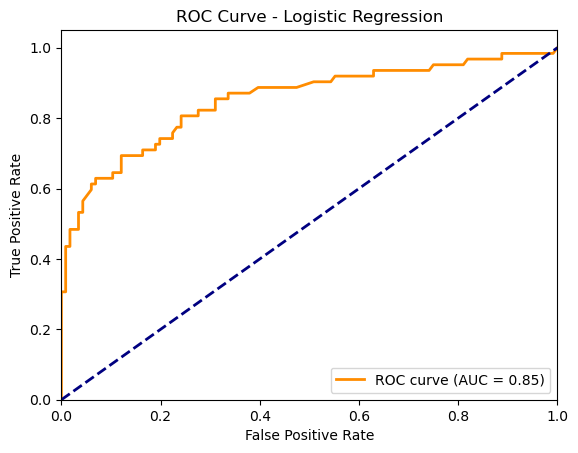

Model: Logistic Regression
AUC: 0.8511540600667407
F1 Score: 0.6875
Recall: 0.7096774193548387
Precision: 0.6666666666666666
Confusion Matrix:
 [[94 22]
 [18 44]]


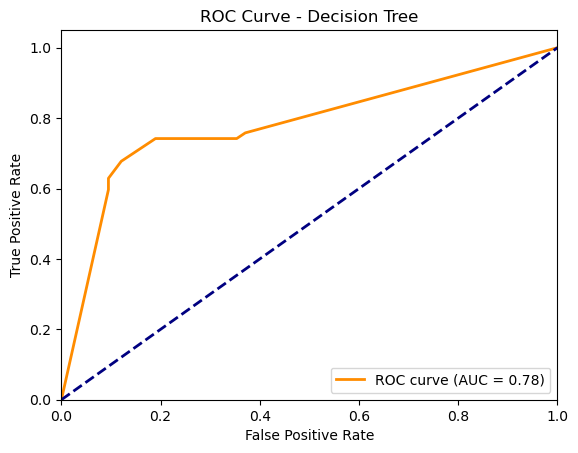

Model: Decision Tree
AUC: 0.7817714126807565
F1 Score: 0.7118644067796611
Recall: 0.6774193548387096
Precision: 0.75
Confusion Matrix:
 [[102  14]
 [ 20  42]]


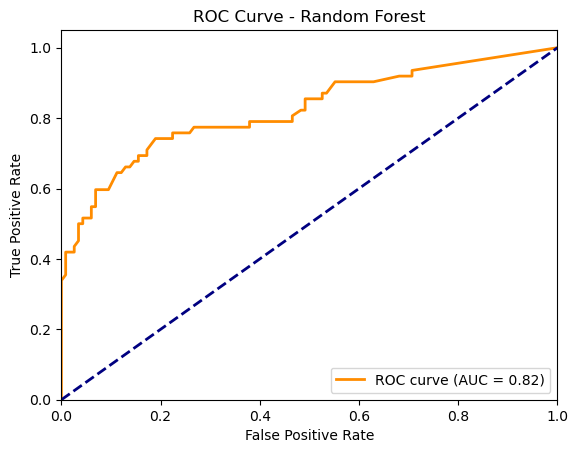

Model: Random Forest
AUC: 0.8223720800889878
F1 Score: 0.689075630252101
Recall: 0.6612903225806451
Precision: 0.7192982456140351
Confusion Matrix:
 [[100  16]
 [ 21  41]]


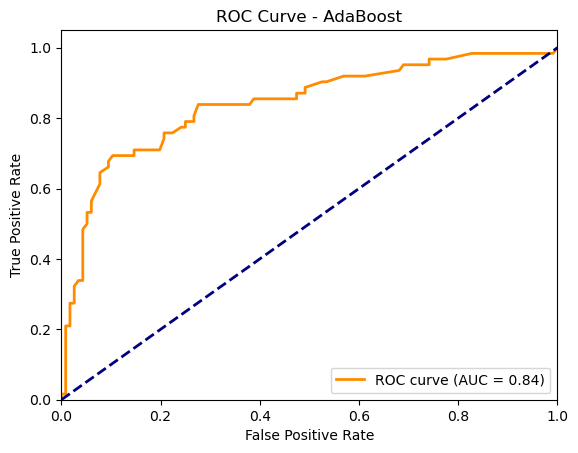

Model: AdaBoost
AUC: 0.8401001112347052
F1 Score: 0.7226890756302521
Recall: 0.6935483870967742
Precision: 0.7543859649122807
Confusion Matrix:
 [[102  14]
 [ 19  43]]


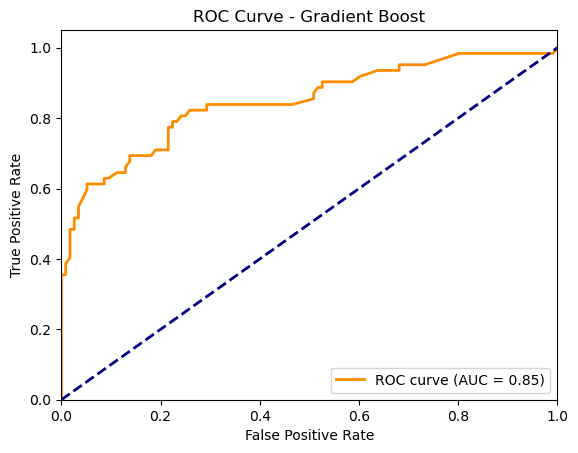

Model: Gradient Boost
AUC: 0.846357063403782
F1 Score: 0.6991869918699187
Recall: 0.6935483870967742
Precision: 0.7049180327868853
Confusion Matrix:
 [[98 18]
 [19 43]]


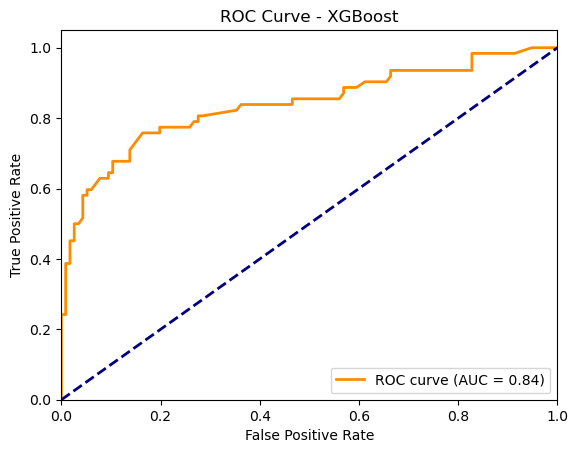

Model: XGBoost
AUC: 0.8385706340378197
F1 Score: 0.7118644067796611
Recall: 0.6774193548387096
Precision: 0.75
Confusion Matrix:
 [[102  14]
 [ 20  42]]


In [48]:
# Example usage for multiple models:
# Define your models
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=100, random_state=42)),
    ('Gradient Boost', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('XGBoost', xgb.XGBClassifier(n_estimators=100, random_state=42))
]


# Evaluate each model
for model_name, model in models:
    evaluate_model(model, X_train_fullSV, y_train, X_val, y_val, model_name)


Vemos que en general son valores aceptables. El modelo que tiene las peores métricas es el de árbol de decisión, lo cual tiene sentido puesto que es simple en comparación de los demás. Puesto que es un modelo inicial, sería viable evaluar las métricas tomando diferentes features de acuerdo al análisis realizado. Adicionalmente, estaría bien usar Recursive Feature Engineering. Y en este proyecto me parece interesante saber si se van a obtener diferentes features significativas dependiendo del modelo con el que se use.

Para esto se hace una función que muestra las features significativas con RFE para cada modelo. En este caso se eligió que fueran 7 features significativas como un número arbitrario, que es más o menos lo que tenía inicialmente.

In [49]:
from sklearn.feature_selection import RFE

In [50]:
# Function to apply RFE with any model
def perform_rfe(model, X_train, y_train, n_features):
    # Initialize Recursive Feature Elimination with the provided model
    rfe = RFE(model, n_features_to_select=n_features)
    
    # Fit the RFE on the training data
    rfe.fit(X_train, y_train)
    
    # Return the selected features
    selected_features = X_train.columns[rfe.support_]
    
    print(f"Selected Features for {model.__class__.__name__}: {selected_features}")
    return selected_features

n_features = 7

for model_name, model in models:
    selected_features = perform_rfe(model, df_train, y_train, n_features)
    print('\n')



C:\Users\Valentina Miranda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Valentina Miranda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Selected Features for LogisticRegression: Index(['Pclass', 'SibSp', 'Cabin_binary', 'Title_Group_3', 'Title_Group_4',
       'Sex_male', 'Age_norm'],
      dtype='object')


Selected Features for DecisionTreeClassifier: Index(['Pclass', 'Age', 'Fare', 'Fare_norm', 'Title_Group_3', 'Sex_male',
       'Age_norm'],
      dtype='object')


Selected Features for RandomForestClassifier: Index(['Pclass', 'Age', 'Fare', 'Fare_norm', 'Title_Group_4', 'Sex_male',
       'Age_norm'],
      dtype='object')


Selected Features for AdaBoostClassifier: Index(['Age', 'SibSp', 'Fare', 'Fare_norm', 'Title_Group_3', 'Sex_male',
       'Age_norm'],
      dtype='object')


Selected Features for GradientBoostingClassifier: Index(['Pclass', 'Age', 'SibSp', 'Fare', 'Fare_norm', 'Sex_male', 'Age_norm'], dtype='object')


Selected Features for XGBClassifier: Index(['Pclass', 'SibSp', 'Fare', 'Cabin_binary', 'Embarked_S',
       'Title_Group_3', 'Sex_male'],
      dtype='object')




Es posible ver cómo se obtuvo diferente features significativas para cada modelo, sin embargo, voy a tomar los que más se repiten en la mayoría y comparar con los que ya tenía para encontrar un balance entre ellos. `Pclass` y `Fare_norm`, `Sex_male` están tanto en la lisa inicial que se había planteado como en la mayoría de los obtenidos con RFE, por lo que estos tres se deben de fijar. Adicionalmente, y algo que me parece peculiar es que no se encuentra ningunas de las variables de `Embarked`, que en realidad creía que estas podrían ser relevantes para el modelo.

También pensé que la variable de `Title` iba a ser más relevante, entonces solo tomaré la que más se repite del RFE.

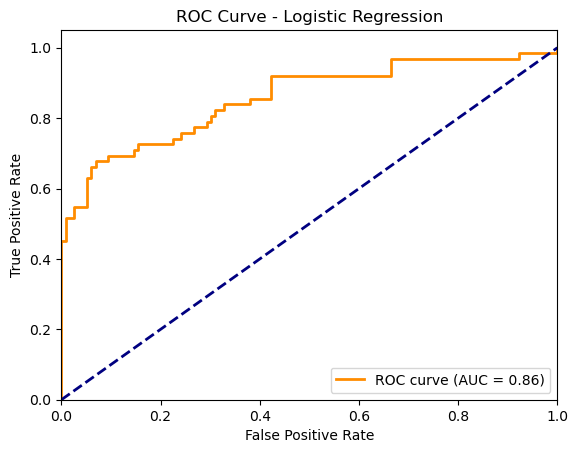

Model: Logistic Regression
AUC: 0.8567853170189099
F1 Score: 0.7096774193548389
Recall: 0.7096774193548387
Precision: 0.7096774193548387
Confusion Matrix:
 [[98 18]
 [18 44]]


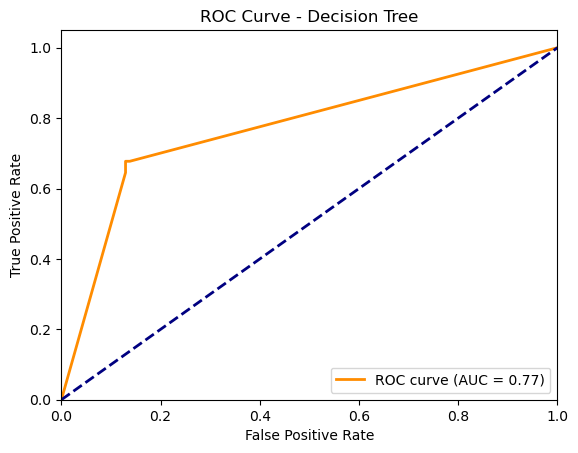

Model: Decision Tree
AUC: 0.7705784204671856
F1 Score: 0.7058823529411764
Recall: 0.6774193548387096
Precision: 0.7368421052631579
Confusion Matrix:
 [[101  15]
 [ 20  42]]


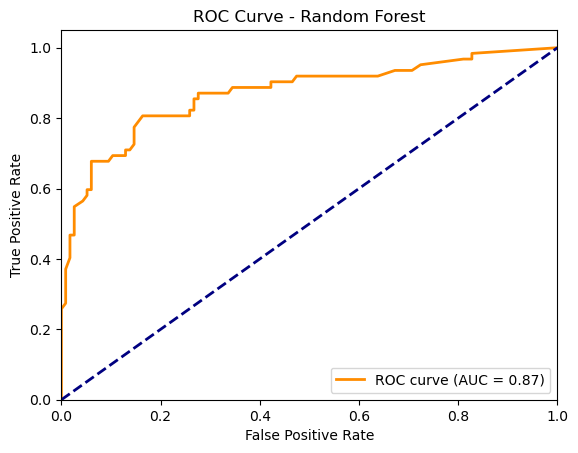

Model: Random Forest
AUC: 0.8706896551724138
F1 Score: 0.7166666666666668
Recall: 0.6935483870967742
Precision: 0.7413793103448276
Confusion Matrix:
 [[101  15]
 [ 19  43]]


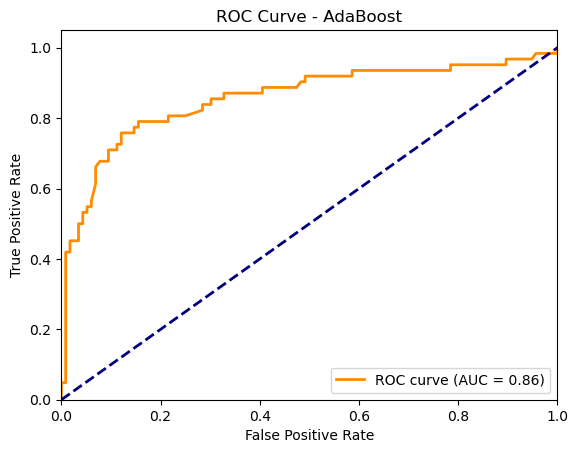

Model: AdaBoost
AUC: 0.85734149054505
F1 Score: 0.7559055118110236
Recall: 0.7741935483870968
Precision: 0.7384615384615385
Confusion Matrix:
 [[99 17]
 [14 48]]


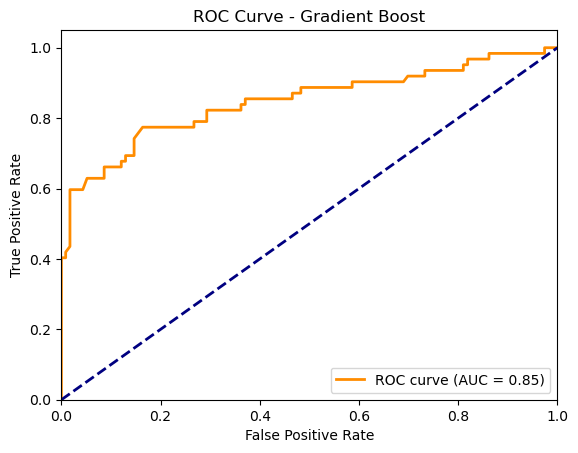

Model: Gradient Boost
AUC: 0.8471913236929923
F1 Score: 0.7130434782608696
Recall: 0.6612903225806451
Precision: 0.7735849056603774
Confusion Matrix:
 [[104  12]
 [ 21  41]]


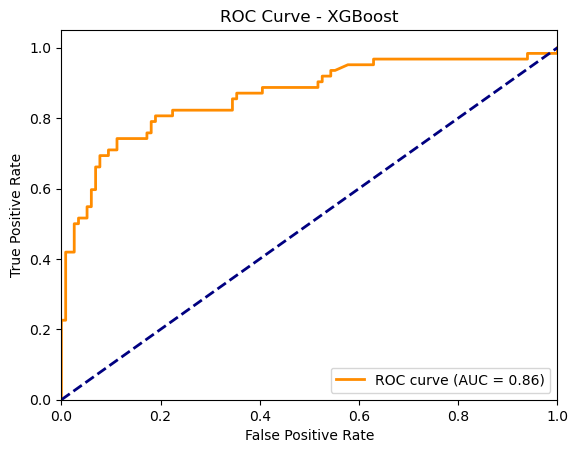

Model: XGBoost
AUC: 0.8642241379310345
F1 Score: 0.7521367521367521
Recall: 0.7096774193548387
Precision: 0.8
Confusion Matrix:
 [[105  11]
 [ 18  44]]


In [51]:
#significant_vars = ['Pclass', 'SibSp', 'Age','Fare_norm', 'Cabin_binary', 'Sex_male', 'Title_Group_3']
#significant_vars = ['Pclass', 'Fare_norm', 'Cabin_binary', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Group_2', 'Title_Group_3', 'Title_Group_4']
significant_vars = ['Pclass', 'Fare_norm', 'SibSp', 'Age','Sex_male', 'Title_Group_3']
#significant_vars = ['Pclass', 'Fare_norm', 'SibSp', 'Age','Sex_male', 'Title_Group_3', 'Cabin_binary', 'Embarked_S']
#significant_vars = ['Pclass', 'Fare_norm', 'SibSp', 'Age_norm','Sex_male']
X_train_fullSV = df_train[significant_vars].values
X_val = df_val[significant_vars].values
X_test = df_test[significant_vars].values


# Evaluate each model
for model_name, model in models:
    evaluate_model(model, X_train_fullSV, y_train, X_val, y_val, model_name)

En general vemos unas métricas positivas. El área bajo la curva es más alta para Random Forest, sin embargo, el F1 score y el recall no son los más altos.

Considero que en este proyecto la métrica que más relevancia debería darle es al F1 score puesto que este representa una medida armónica entre precisión y recall. Esto debido a que el problema que estamos tratando no implica cosas diferentes tanto si predice que la persona sobrevive como si no sobrevive. Es decir, el costo de los falsos positivos o falsos negativos no prima sobre el otro.

En este sentido, el modelo con AdaBoost nos da un F1 score de 0.7559055118110236, que es el más alto.

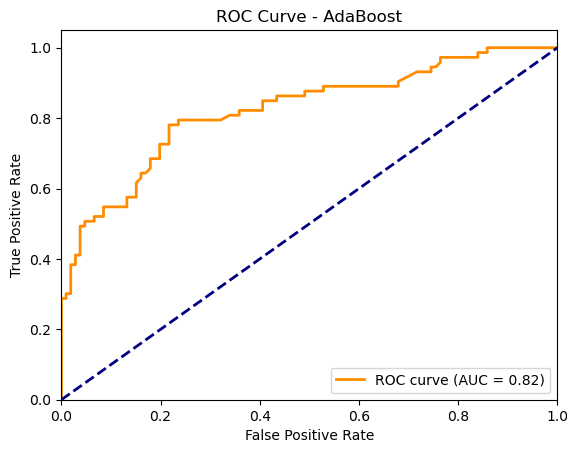

Model: AdaBoost
AUC: 0.822628586197984
F1 Score: 0.6861313868613139
Recall: 0.6438356164383562
Precision: 0.734375
Confusion Matrix:
 [[89 17]
 [26 47]]


In [52]:
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model_name = 'AdaBoost'

evaluate_model(model, X_train_fullSV, y_train, X_test, y_test, model_name)

# Conclusiones generales

Durante el desarrollo de este proyecto me pareció bastante interesante y entretenido tener la oportunidad de leer acerca del Titanic para poder entender mejor las features. Me hubiera gustado encontrar una forma de incluir la variable `Cabin` de algún otro modo, pero después de pensar mucho, eso fue lo único que se me ocurrió. Además, también hubiera querido indagar más sobre la columna `Ticket` y el significado de los datos que tenían algunas letras y los que no, aunque no entendí muy bien lo que encontré, y en la mayoría se refería a la acomodación desde la A hasta la F, que correspondía a la variable `Cabin` mas no al ticket.

Al final resultaron las features significativas más pocas de las que esperaba, además, al usar RFE me di cuenta de que debía usar `SibSp` aunque este hubiera tenido una correlación y MIS bajos en comparación con las demás features. Esto me ayudó a entender que la selección de las features es un proceso en el que es posible obtener muchísimos resultados dependiendo de las interpretaciones y que no todas terminan de brindar de forma tan evidente la posible importancia que pueden llegar a tener en el modelo.

Por otro lado, al probar el modelo final con el conjunto de test, las métricas disminuyeron. En específico el F1 score, que era la métrica que me servía de criterio para comparar los modelos, bajó mucho en comparación con la data de validación. Esto podría dar a entender que el modelo no llegó a generalizar de forma adecuada.